# Analise de Demanda

Imagine que trabalhamos em uma industria de calçados e queremos analisar a distribuição do estoque das lojas.

Objtivos:
1. Ler a base de dados utilizar os principios da analise exploratoria de dados visto anteriormente.

2. Analisar a distribuição do estoque e verificar se ela se assemelha a alguma distribuição conhecida.

3. Calcular qual seria a amostra necessária para estimarmos a media do estoque de cada uma das lojas com margem de erro de 2% e 10% e nivel de significancia de 5%


 Antes de comecarmos vamos fazer a leitura dos pacotes necessários

In [2]:
### para manipulação dos dados em python
import pandas as pd
import numpy as np

### para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'seaborn'


### 1. Leitura e análise exploratória dos dados

In [ ]:
### leitura dos dados csv
df = pd.read_csv("/content/estoque.csv", sep = ";")

: 

In [ ]:
### verificando as 5 primeiras linhas dos dados
df.head(5)

: 

In [ ]:
### verificando os tipos dos dados encontrados
df.dtypes

: 

In [ ]:
### vamos converter da data para o tipo data
df["data"] = pd.to_datetime(df["data"])

: 

In [ ]:
### verificando novamente os tipos dos dados encontrados
df.dtypes

: 

In [ ]:
### rodando um describe para obter as frequencias e medidas das variáveis numéricas
df.describe()

: 

Pelo describe acima vemos que temos na base o estoque e a data de medição de 3 lojas da empresa de calçados

vamos agora analisar alguns dados por loja

In [ ]:
df.groupby(["id_loja"]).agg({"estoque": [np.mean, np.min, np.max, np.std], "data": [np.min, np.max]})

: 

Pela tabela acima, vemos que:
-  A loja 3 tem uma média maior de estoque do que as outras lojas e desvio padráo menor, proximo a 5.
- A loja 2 possui uma média menor de estoque e desvio padrão proximo a 6
- A loja 1 possui média de apx 180 calçados e maior desvio padrão, apx 9.7

Vamos agora analisar o histograma da distribuicão do estoque por loja

### 2. Analise da distribuição do estoque por loja

In [ ]:
numero_lojas =  df.id_loja.nunique() ### numero de lojas
numero_lojas

: 

In [ ]:
#### setando a paleta de cores
sns.set_palette("icefire")

numero_lojas =  df.id_loja.nunique()
fig, ax = plt.subplots(nrows=1, ncols=numero_lojas, figsize=(12, 5))
i = 0
for loja in df.id_loja.unique():
  ### histograma
  sns.set(style="darkgrid")
  sns.histplot(df[df.id_loja == loja]["estoque"], ax=ax[i], kde=True, edgecolor=None)
  ax[i].set_title('Distribuição do Estoque Diário Loja {}'.format(loja))
  ax[i].set_xlabel('Estoque Diário')
  ax[i].set_ylabel('Contagem')
  ### adiciona contador
  i = i + 1

plt.tight_layout()
plt.show()

: 

Podemos ver que todos os estoques das lojas apresentam uma distribuição em formato de sino, que se assemelha muito visualmente a distribuição normal.
A loja 1 porém apresenta uma assimetria na distribuição do estoque para a esquerda.

Alternativamente, poderiamos analisar em um unico gráfico

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="estoque", hue="id_loja", bins = 40,kde=True, palette=sns.color_palette("icefire", n_colors=3))
plt.title(label= "Distribuição do estoque por loja")
plt.show()

: 

In [ ]:
# Plotamos um gráfico Boxplot com a mesma paleta de cores
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='estoque', x='id_loja', palette=sns.color_palette("icefire", n_colors=3))
plt.title('Boxplot da Estoque por Loja')
plt.show()

: 

Podemos perceber que o estoque da loja 3 é bem maior do que o das outras lojas e não existe overlap de estoques entre tais lojas. o que pode ser um indicativo de que:
1. As lojas apresentam compartamento de consume bem diferente, podendo estar localizadas em regioes ou pontos de venda diferentes
2. A loja 3 supostamente deve ser a que mais vende, necessitando assim de um maior estoque

## 3. Calcular qual seria a amostra necessária para estimarmos a média do estoque de cada uma das lojas

Para calcular a amostra necessária para compararmos a média do estoque de duas lojas vamos precisar da formula da margem de erro para médias em que o desvio padrao é desconhecido, vamos verificar antes o tamanho da amostra que temos para decidir qual formula utilizar

In [ ]:
df[["id_loja","estoque"]].groupby("id_loja").count()

: 

Como temos 58 informações de estoque de cada uma das lojas podemos utilizar a aproximação de sigma = amplitude/4 ou sigma ou assumir que sigma é igual ao desvio padrão amostral

Assumindo o primeiro caso precisaremos da seguinte fórmula:

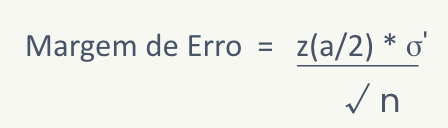

E seus respectivos inputs
- sigma ': estimado a partir da amplitude, portante necessitaremos os valores max, min do estoque de cada loja para dividir essa diferença por 4
- n é o que queremos descobrir
- z(a/2) é o valor da estatistica z para o nível de significancia a assumindo que a distribuição é bicaldal.

Vamos primeiramente obter os inputs da fórmula para depois substituirmos os valores.



1. Primeira Loja

In [ ]:
##### INPUTS LOJA 1

#### sigma estimado com a amplitude
sigma_linha = (df[df.id_loja == 1]["estoque"].max() - df[df.id_loja == 1]["estoque"].min())/4


#### valor de z(a/2) para a = 5%
from scipy.stats import norm #### pacote necessário

a = 0.05
z = norm.ppf(1-a/2)

### n = ((z*sigma_linha)/me)**2

### margem , me = 2%
me = 0.02
n = round(((z*sigma_linha)/me)**2,0)
print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia")
me = 0.1 ### para margem de erro de 10%
n = round(((z*sigma_linha)/me)**2,0)
print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia")


: 

2. Todas as lojas

In [ ]:
#### valor de z(a/2) para a = 5%
from scipy.stats import norm #### pacote necessário

a = 0.05
z = norm.ppf(1-a/2)

for loja in df.id_loja.unique():
  sigma_linha = (df[df.id_loja == loja]["estoque"].max() - df[df.id_loja == loja]["estoque"].min())/4

  ### n = ((z*sigma_linha)/me)**2

  ### margem 2% , me = 2%
  me = 0.02
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia para a loja "+str(loja))
  ##margem 10% , me = 10%
  me = 0.1
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia para a loja "+str(loja))


: 

Utilizando a estimação de sigma com a segunda opção (assumindo que o desvio padrao amostral = populacional)

In [ ]:
#### valor de z(a/2) para a = 5%
from scipy.stats import norm #### pacote necessário

a = 0.05
z = norm.ppf(1-a/2)

for loja in df.id_loja.unique():
  sigma_linha = df[df.id_loja == loja]["estoque"].std()

  ### n = ((z*sigma_linha)/me)**2

  ### margem 2% , me = 2%
  me = 0.02
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 2% e 5% de significancia para a loja "+str(loja))
  ##margem 10% , me = 10%
  me = 0.1
  n = round(((z*sigma_linha)/me)**2,0)
  print("O tamanho da amostra será de "+str(n)+" para margem de erro de 10% e 5% de significancia para a loja "+str(loja))


: 

: 